In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from tonotopy import *
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
import json
import numpy as np
from format_data import *
from utils import *
import pickle


In [2]:
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)
#gc = np.arange(0, 32)

In [3]:
path = '/auto/data2/eTheremin/ALTAI/ALTAI_20240806_SESSION_00/'
folder = 'headstage_0'

In [4]:
data = np.load(path+'headstage_0/data_0.005.npy', allow_pickle=True)
features = np.load(path+'headstage_0/features_0.005.npy', allow_pickle=True)
#gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)
gc = np.arange(0, 32)
frequences = np.load(path+'headstage_0/unique_tones.npy', allow_pickle=True)
#heatmaps = np.load(path+'headstage_0/heatmap_plot_playback.npy', allow_pickle=True)

In [5]:
condition = 'tracking'

In [6]:
get_tonotopy(data, features, t_pre, t_post, bin_width, gc, frequences, 1, 1, condition, path+'/headstage_0/'+f'heatmap_plot_{condition}.npy')

[array([[2.        , 0.        , 3.        , ..., 4.        , 4.        ,
         1.        ],
        [2.2       , 2.4       , 2.5       , ..., 2.        , 2.5       ,
         2.6       ],
        [1.89583333, 2.5       , 2.39583333, ..., 2.4375    , 1.91666667,
         2.3125    ],
        ...,
        [1.72972973, 1.51351351, 1.43243243, ..., 2.13513514, 2.18918919,
         2.02702703],
        [1.7       , 1.8       , 1.2       , ..., 1.8       , 1.7       ,
         1.3       ],
        [2.        , 4.        , 4.        , ..., 2.        , 3.        ,
         1.        ]]),
 array([[2.        , 1.        , 0.        , ..., 3.        , 1.        ,
         2.        ],
        [2.        , 2.7       , 2.6       , ..., 2.9       , 3.2       ,
         2.4       ],
        [2.        , 2.02083333, 1.64583333, ..., 1.95833333, 1.89583333,
         1.54166667],
        ...,
        [1.97297297, 2.10810811, 2.2972973 , ..., 2.32432432, 2.32432432,
         2.08108108],
        [1.8

In [7]:
heatmaps = np.load(path+f'headstage_0/heatmap_plot_{condition}.npy', allow_pickle=True)

[44.         43.23005749 43.         42.75139339 43.         44.
 44.76781848 44.37534366 44.        ] [22.32278333 22.         21.74991107 21.         20.77370736 20.35155661
 21.         22.         22.32278333]
[44.         43.         42.83063582 42.44520121 43.         44.
 44.72116156 44.16386871 44.        ] [22.0710112  22.1925296  22.         21.         20.33058066 20.43539055
 21.         22.         22.0710112 ]
[44.         43.         42.76950332 42.         41.80867499 42.
 42.16543665 42.13045093 42.39340457 42.9815323  43.         44.
 44.84204252 45.         46.         46.25474649 46.62993167 46.05032001
 46.14943056 46.         45.         44.71624647 44.        ] [22.25452888 22.16803921 22.         21.30839206 21.         20.30331852
 20.         19.         18.         17.         16.97211682 16.29500243
 17.         17.04619701 17.27404305 18.         19.         20.
 21.         21.10619675 21.82836277 22.         22.25452888]
[44.         43.         42.550611

'all izz well'

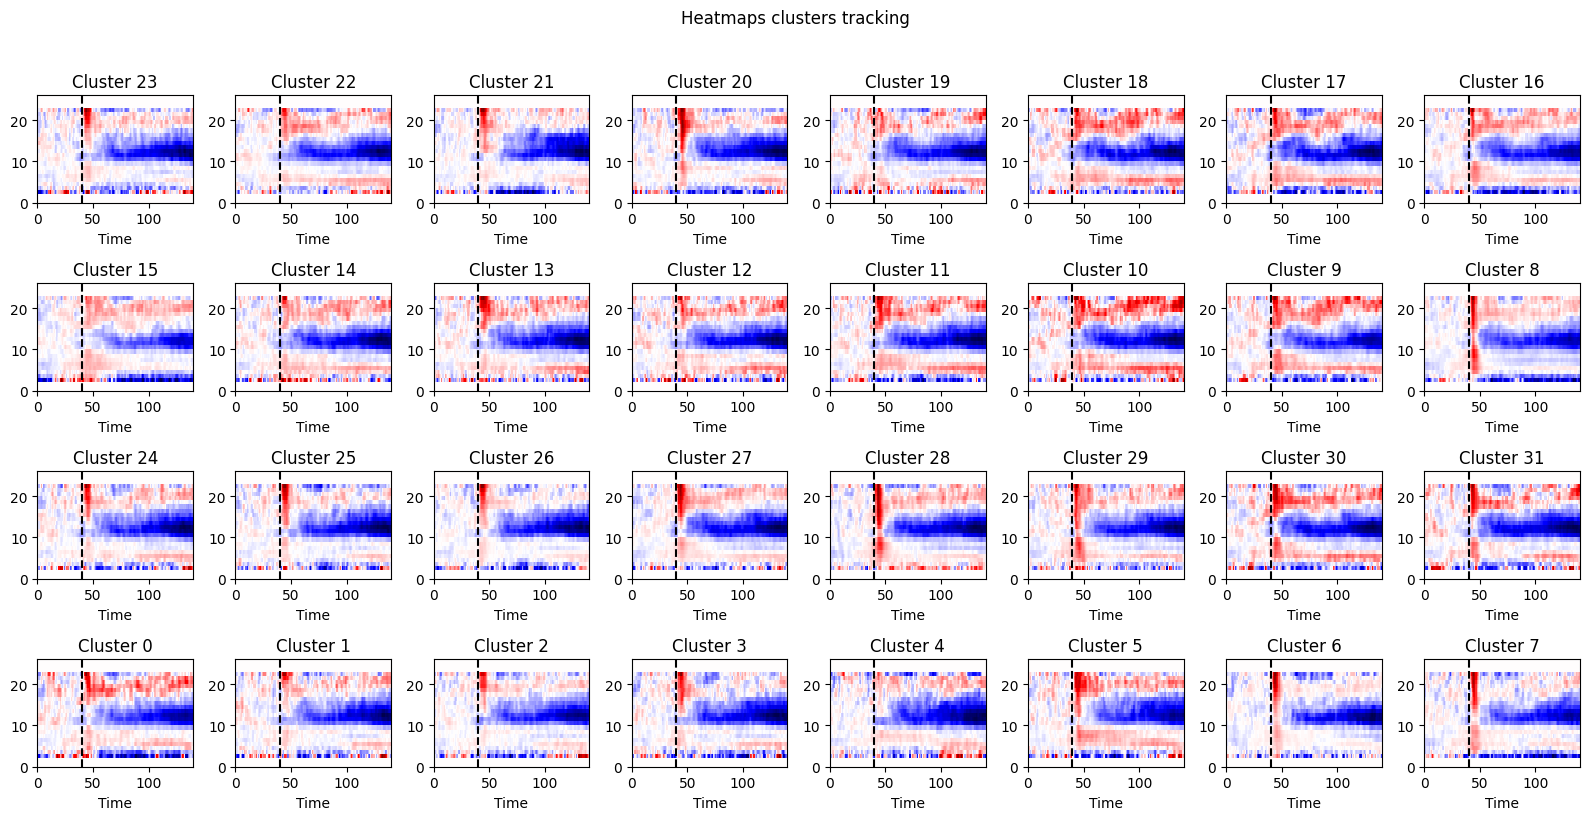

In [8]:
plot_heatmap_bandwidth(heatmaps,3.2, gc,frequences, 1, 2, bin_width, psth_bins, t_pre,path, folder, condition)

In [9]:
def plot_heatmap_bandwidth(heatmaps,threshold, gc,unique_tones, min_freq, max_freq, bin_width, psth_bins, t_pre,path, folder, condition):
    """""
    Best function pour déterminer la bandwidth et plotter la heatmap et les contours de la bandwidth
    input : heatmaps(contenant plusieurs clusters), le threshold pour la detection du pic, good_clusters
        unique_tones (les fréquences jouées), min_freq, max_freq : les indices des fréquences qu'on exclut (pas assez de présentations)
        condition : 'tracking' ou 'playback'
    output : save plot des heatmap avec la bandwidth entourée .png
            save tableau des heatmaps telles que plottée (avec les psth) .npy
            save tableau contenant les bandwidth de chaque cluster .npy
            
    """
    
    # pour les plots:

    #num_rows, num_columns = get_plot_geometry(gc)
    
    num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


    # Create a figure with subplots
    fig, axes = plt.subplots(4, 8, figsize=(16, 8))
    fig.suptitle(f'Heatmaps clusters {condition}', y=1.02)
    plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
    #if num_rows > 1 and num_columns > 1:
        #axes = axes.flatten()
    #
    bandwidth = []
    plotted_heatmap = []
    peaks = []
    for cluster in range(num_plots):
        if cluster < num_plots:
            row, col = get_plot_coords(cluster)
            #print(cluster)
            heatmap_cluster = np.array(heatmaps[cluster])
            hm, peak = detect_peak(heatmaps, cluster)
            #heatmap_min = np.min(heatmap_cluster)
            #heatmap_max = np.max(abs(heatmap_cluster))
            #abs_max = max(abs(heatmap_min), abs(heatmap_max))
            #abs_max = np.max(abs(heatmap_cluster[min_freq:-max_freq]))
            abs_max = np.max(abs(heatmap_cluster[3:-3]))*0.4
            contours = get_contour(hm, threshold)
            #j'essaye en prenant la absolute value de hm
            #contours = get_contour(np.abs(hm), threshold)
            
        # Je retire la moyenne pre-stim ligne par ligne (fréquence par fréquence)
            t_0 = int(t_pre/bin_width)
            prestim_hm = heatmap_cluster[:, :t_0]
            mean_freq = np.mean(prestim_hm, axis=1)

            for i in range(heatmap_cluster.shape[0]):  # Parcours des lignes de A
                heatmap_cluster[i] -= mean_freq[i]
            
            
            smoothed = smooth_2d(heatmap_cluster, 3)
            
            #je mets des zeros aux frequences trop hautes et trop basses où je n'ai pas
            #assez de présentations
            lowf = np.zeros((min_freq+1, len(smoothed[0])))
            highf = np.zeros((max_freq+1, len(smoothed[0])))
            
            milieu = np.concatenate((lowf, smoothed[min_freq:-max_freq]))

            # Concaténation à l'arrière
            milieu = np.concatenate((milieu, highf))
            vmin = np.min(milieu)  # Valeur minimale dans ta matrice
            vmax = np.max(milieu)  # Valeur maximale dans ta matrice
            norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # Normalisation centrée sur 0
            #img = axes[row, col].pcolormesh(milieu, cmap=create_centered_colormap(abs_max), vmin=-abs_max, vmax=abs_max)
            img = axes[row, col].pcolormesh(milieu, cmap='seismic', norm=norm)
            #axes[row, col].set_yticks(np.arange(len(unique_tones)), unique_tones)
            axes[row, col].set_xlabel('Time')
            #axes[row, col].set_ylabel('Frequency [Hz]')
            axes[row, col].set_title(f'Cluster {gc[cluster]}')
            axes[row, col].axvline(x=t_0, color='black', linestyle='--') # to print a vertical line at the stim onset time
        

            #Je ne prends la réponse qu'entre 40 et 60ms
            #max = 0
            #min = len(unique_tones[min_freq:-max_freq])-2
            max_length =  0    
            x_c, y_c, minf, maxf = np.nan, np.nan, 0,0 # au cas où on trouve pas de contour
            for contour in contours:
                if ((contour[:, 1] > t_0-5).all() and (contour[:, 1] < t_0+10).all()):
                    if len(contour[:, 0])>max_length:
                        max_length = len(contour[:, 0])
                        x_c = contour[:, 1]
                        y_c = contour[:, 0]
                        maxf = np.max(contour[:, 0])
                        minf = np.min(contour[:, 0])
                        test = contour[:, 0]
                        if maxf<len(unique_tones)-1:
                            maxf+=1
            #axes[row, col].plot(x_c, y_c, linewidth=2, color='green')
            print(x_c, y_c)
            #print(plotted_freq[int(min)], plotted_freq[int(max)])
            # je mets np.nan dans bandwidth si je ne trouve pas de contour
            if max_length==0 or maxf==0:
                bandwidth.append([np.nan, np.nan])
                peaks.append(np.nan)
            else : 
            
            #je prends +1 dans le maxf
                bandwidth.append([unique_tones[int(minf)], unique_tones[int(maxf)]])
                peaks.append(unique_tones[peak[0]])
            plotted_heatmap.append(milieu)
            #cbar_ax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.02, ax.get_position().height])
            #fig.colorbar(img, cax=cbar_ax)
        # Hide any unused subplots
    for ax in axes[num_plots:]:
        ax.axis('off')
    plt.tight_layout()  